In [2]:
import os

import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio

import snail.intersection

In [12]:
root_dir = ".."

raster_path = "/home/fred/projects/world_bank/thai2011_floods_JBA/Raster/TH_FLRF_ChaoPhraya2011_RD_01.tif"
grid = snail.intersection.GridDefinition.from_raster(raster_path)

edges = gpd.read_parquet(os.path.join(root_dir, "results/composite_network/south-east-asia-rail/edges.gpq"))
edges = snail.intersection.prepare_linestrings(edges)

In [18]:
splits = snail.intersection.split_linestrings(edges, grid)

In [23]:
splits_with_indicies = snail.intersection.apply_indices(splits, grid)

In [50]:
with rasterio.open(raster_path) as dataset:
    raster = dataset.read(1)
depths = snail.intersection.get_raster_values_for_splits(splits_with_indicies, raster)

In [52]:
splits_with_depths = splits_with_indicies.copy()
splits_with_depths["depth_m"] = depths

<Axes: >

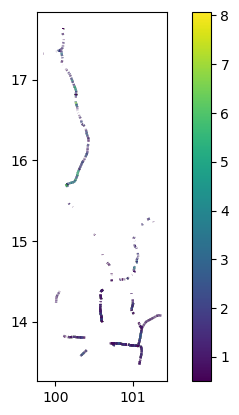

In [85]:
failure_threshold = 0.5
failed_splits_mask = splits_with_depths.depth_m > failure_threshold
splits_with_depths[failed_splits_mask].plot("depth_m", legend=True)

In [75]:
failed_edge_ids = set(splits_with_depths[failed_splits_mask].id.unique())

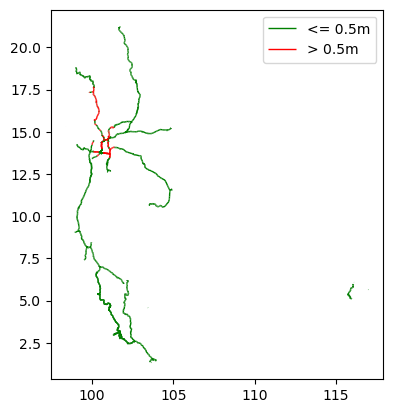

In [84]:
f, ax = plt.subplots()
edges[~edges.id.isin(failed_edge_ids)].plot(ax=ax, color="g", lw=1, label=f"<= {failure_threshold}m")
edges[edges.id.isin(failed_edge_ids)].plot(ax=ax, color="r", lw=1, label=f"> {failure_threshold}m")
ax.legend()

In [87]:
edges_safe = edges[~edges.id.isin(failed_edge_ids)]

<Axes: >

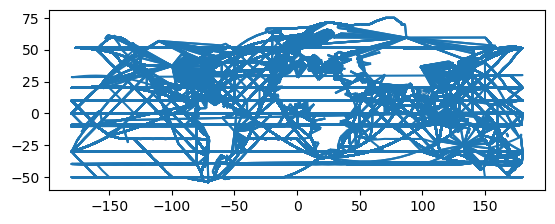

In [3]:
gdf = gpd.read_parquet("../results/multi-modal_network/project-thailand/hazard-thai-floods-2011-JBA/edges.gpq")
gdf.plot()